In [224]:
#importing libraries and dataset
import pandas as pd
import math
import statistics as stat
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

#importing datasets

df_ratings = pd.read_csv("ratings.csv")

df_links = pd.read_csv("links.csv")
df_movies = pd.read_csv("movies.csv")
df_tags = pd.read_csv("tags.csv")


In [225]:
#rating data_Set head till 10 rows
df_ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [226]:
#summary of dataset
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [227]:
print("Count or Shape of ratings data set is" + str(df_ratings.shape))
print("Number of unique users are: ", df_ratings['userId'].nunique())
print("Number of movies are: ", df_ratings['movieId'].nunique())
print("Unique Ratings are: ", sorted(df_ratings['rating'].unique()))

Count or Shape of ratings data set is(100836, 4)
Number of unique users are:  610
Number of movies are:  9724
Unique Ratings are:  [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


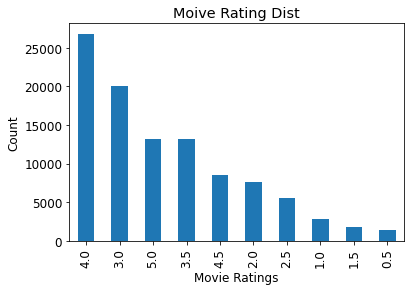

In [228]:
# most rating number given by users
plt.rc('font',size=12)
df_ratings.rating.value_counts(sort=True).plot(kind='bar')
plt.title('Moive Rating Dist')
plt.xlabel('Movie Ratings')
plt.ylabel('Count')
plt.show()

In [229]:
#movie dataset
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [230]:
#here I merge movies dataset and ratings dataset
df=pd.merge(df_ratings,df_movies, on='movieId', how='inner')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [231]:
#making a table dataframe which has movie name and there mean ratings and total count 

df_avg_ratings=df.groupby('title').agg(ratings_count=('rating','count'),ratings_mean=('rating','mean')).reset_index()

#sort by rating count to find which are the most rated movie
df_avg_ratings.sort_values(by='ratings_count',ascending=False).head()

,title,ratings_count,ratings_mean
3158,Forrest Gump (1994),329,4.164134
7593,"Shawshank Redemption, The (1994)",317,4.429022
6865,Pulp Fiction (1994),307,4.197068
7680,"Silence of the Lambs, The (1991)",279,4.161290
5512,"Matrix, The (1999)",278,4.192446


In [232]:
df_merge = pd.merge(df,df_avg_ratings[['title']], on='title', how='inner')
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [233]:
#creating user base matrix
user_matrix=df.pivot_table(index='userId',columns='title', values='rating')

#taking pearson similarity correlation
user_sim=user_matrix.T.corr('pearson')
user_sim.head()



userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,0.091574,-2.071128e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-0.387347,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,0.117851,NaN,0.485794,...,-0.222113,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,0.158114,0.028347,NaN,-0.777714,...,0.000000,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582


In [234]:
#Making a sub-group of 3 similar users for USERId:1

#User ID:1 similairty row
user_sim1=user_sim[user_sim.index==1]


In [235]:
user=1
#drop this user from the user_sim table
sim1=user_sim.copy()
sim1.drop(index=user, inplace = True)

In [236]:
#check 3  similar users as compared to target user 1

u=8          #find 3 similar_user randonly out of 8
user_thrsh = 0.01
#user which has similarity more than 0.05 only
simuser1=sim1[sim1[user]>user_thrsh][user].sort_values(ascending=False)[:u]


print("similar user for "+ str(user) + " are "+ str(simuser1.head(8)))

similar user for 1 are userId
550    1.000000
146    1.000000
106    1.000000
333    1.000000
598    1.000000
473    0.962250
511    0.925820
9      0.918559
Name: 1, dtype: float64


# We make a group of 3 users having userID: 550, 473, 106.

In [237]:
#movies watched by similar_user with userId: 550
#Selecting first target user [ 550 ] for generating 10 simlilar users later on and 20 moveis
#for this user: 550
user=550

#drop this user from the user_sim
sim11=user_sim.copy()
sim11.drop(index=user, inplace = True)
#check top 10 similar users as compared to target user 550 and find common movies watched by them
u=10         #find 10 similar_user randonly
user_thrsh = 0.01
#user which has similarity more than 0.05 only
simuser11=sim11[sim11[user]>user_thrsh][user].sort_values(ascending=False)[:u]
print("similar user for "+ str(user) + " are "+ str(simuser11.head(10)))

similar user for 550 are userId
607    1.0
1      1.0
430    1.0
121    1.0
335    1.0
372    1.0
385    1.0
69     1.0
72     1.0
38     1.0
Name: 550, dtype: float64


In [238]:
#movies watched by selected user 550
user_watched11=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')
user_watched11

title,21 Jump Street (2012),"Avengers, The (2012)",Avengers: Age of Ultron (2015),Captain America: The First Avenger (2011),Catch Me If You Can (2002),"Dark Knight, The (2008)",Deadpool (2016),Easy A (2010),Ex Machina (2015),Forrest Gump (1994),...,Mad Max: Fury Road (2015),"Matrix, The (1999)","Shawshank Redemption, The (1994)",The Imitation Game (2014),The Martian (2015),Thor (2011),Toy Story (1995),Up (2009),WALL·E (2008),"Wolf of Wall Street, The (2013)"
userId,,,,,,,,,,,,,,,,,,,,,
550,4.0,5.0,4.0,3.5,4.0,4.0,5.0,4.0,4.5,4.0,...,4.0,4.5,4.5,4.5,4.0,4.0,4.0,4.5,4.0,4.0


In [239]:
# common movies watched by similar users of target user
movies_similar_user101=user_matrix[user_matrix.index.isin(simuser11.index)].dropna(axis=1, how='all')


score_list101={} #score container

#print top 20 recommended movies based on movie_score
#movie_score is multiplication of user_similarity and movie_rating
for i in movies_similar_user101.columns:
    movie_rating=movies_similar_user101[i]
    tsc=0
    count=0
    for u in simuser11.index:
        if pd.isna(movie_rating[u])==False:
            score=simuser11[u]*movie_rating[u]
            tsc=tsc+score
            count=count+1
    score_list101[i]=tsc/count

score_list101=pd.DataFrame(score_list101.items(), columns=['movie', 'movie_score'])
score_list101=score_list101.sort_values(by='movie_score', ascending=False)
mov=20
print("Top "+str(mov)+" recommended movies for UserId "+ str(user))

score_list101.head(mov)

Top 20 recommended movies for UserId 550


,movie,movie_score
402,Miracle on 34th Street (1947),5.0
661,"Untouchables, The (1987)",5.0
455,"Perfect Storm, The (2000)",5.0
289,Halloween: The Curse of Michael Myers (Hallowe...,5.0
244,Friday the 13th (1980),5.0
38,Animal House (1978),5.0
676,Wes Craven's New Nightmare (Nightmare on Elm S...,5.0
229,First Blood (Rambo: First Blood) (1982),5.0
157,Daylight (1996),5.0
431,Never Cry Wolf (1983),5.0


In [240]:
#Now recommend movies watched by userId: 473
#Selecting second similar user [ 473 ] for generating 10 simlilar users later on and 20 moveis
user=473    

#drop this user from the user_sim
sim12=user_sim.copy()
sim12.drop(index=user, inplace = True)

#check top 10 similar users as compared to useriD 473 and find common movies watched by them
u=10         #find 10 similar_user randonly for userId: 473    
user_thrsh = 0.01
#user which has similarity more than 0.05 only
simuser12=sim12[sim12[user]>user_thrsh][user].sort_values(ascending=False)[:u]
#movies watched by selected userId:473    
user_watched12=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')

#common movies watched by similar users of userId: 473    
movies_similar_user102=user_matrix[user_matrix.index.isin(simuser12.index)].dropna(axis=1, how='all')

#prediction function
score_list102={}

#print top 20 recommended movies based on movie_score
#movie_score is multiplication of user_similarity and movie_rating
for i in movies_similar_user102.columns:
    movie_rating=movies_similar_user102[i]
    tsc=0
    count=0
    for u in simuser12.index:
        if pd.isna(movie_rating[u])==False:
            score=simuser12[u]*movie_rating[u]
            tsc=tsc+score
            count=count+1
    score_list102[i]=tsc/count

score_list102=pd.DataFrame(score_list102.items(), columns=['movie', 'movie_score'])
score_list102=score_list102.sort_values(by='movie_score', ascending=False)
mov=20
print("Top "+str(mov)+" recommended movies for UserId "+ str(user))

score_list102.head(mov)

Top 20 recommended movies for UserId 473


,movie,movie_score
197,Field of Dreams (1989),5.0
402,Rear Window (1954),5.0
102,Bridget Jones's Diary (2001),5.0
515,Unforgiven (1992),5.0
484,Swingers (1996),5.0
114,Christmas Vacation (National Lampoon's Christm...,5.0
505,Traffic (2000),5.0
448,"Slums of Beverly Hills, The (1998)",5.0
229,Goodfellas (1990),5.0
195,Ferris Bueller's Day Off (1986),5.0


In [241]:
#now taking Third similar user of Target UserID:1
#movies watched by similar_user with userId: 106


#Selecting second similar user [ 106 ] for generating 10 simlilar users later on and 20 moveis
user=106

#drop this user from the user_sim
sim13=user_sim.copy()
sim13.drop(index=user, inplace = True)

#check top 10 similar users as compared to useriD 106 and find common movies watched by them
u=10         #find 10 similar_user randonly for userId: 106
user_thrsh = 0.01
#user which has similarity more than 0.01 only
simuser13=sim13[sim13[user]>user_thrsh][user].sort_values(ascending=False)[:u]


#print("similar user for "+ str(user) + " are "+ str(simuser13.head(10)))

#movies watched by selected userId:106
user_watched13=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')

#print common movies watched by similar users of userId: 106
movies_similar_user103=user_matrix[user_matrix.index.isin(simuser13.index)].dropna(axis=1, how='all')

score_list103={}

#print top 20 recommended movies based on movie_score
#movie_score is multiplication of user_similarity and movie_rating
for i in movies_similar_user103.columns:
    movie_rating=movies_similar_user103[i]
    tsc=0
    count=0
    for u in simuser13.index:
        if pd.isna(movie_rating[u])==False:
            score=simuser13[u]*movie_rating[u]
            tsc=tsc+score
            count=count+1
    score_list103[i]=tsc/count

score_list103=pd.DataFrame(score_list103.items(), columns=['movie', 'movie_score'])
score_list103=score_list103.sort_values(by='movie_score', ascending=False)
mov=20
print("Top "+str(mov)+" recommended movies for UserId "+ str(user))

score_list103.head(mov)


Top 20 recommended movies for UserId 106


,movie,movie_score
444,Harvey (1950),5.0
245,Deadpool 2 (2018),5.0
787,Raging Bull (1980),5.0
890,Sling Blade (1996),5.0
947,Strangers on a Train (1951),5.0
502,Inglourious Basterds (2009),5.0
966,Swept Away (Travolti da un insolito destino ne...,5.0
70,Avengers: Infinity War - Part I (2018),5.0
232,"Dark Knight, The (2008)",5.0
65,Austin Powers in Goldmember (2002),5.0


In [242]:
#movies watched by selected user 550
user_watched11=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')

#movies watched by selected userId:473    
user_watched12=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')

#movies watched by selected userId:106
user_watched13=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')

#recommended movies for group user 550
score_list101

#recommended movies for group user 473
score_list102

#recommended movies for group user 106
score_list103


#merging 2 users to get common movie and score data frame
df_merge=pd.merge(score_list101,score_list102, on='movie')
df_merge.head(20)


,movie,movie_score_x,movie_score_y
0,Never Cry Wolf (1983),5.0,4.000000
1,Double Jeopardy (1999),5.0,4.000000
2,"Breakfast Club, The (1985)",5.0,3.000000
3,"Green Mile, The (1999)",5.0,3.500000
4,"Messenger: The Story of Joan of Arc, The (1999)",5.0,3.000000
5,"Wizard of Oz, The (1939)",5.0,1.000000
6,Rushmore (1998),5.0,3.000000
7,"Jungle Book, The (1994)",5.0,3.000000
8,Run Lola Run (Lola rennt) (1998),5.0,4.000000
9,Citizen Kane (1941),5.0,3.500000


In [243]:
 
#merged all 3 group users to get common movie and score
df_merge1=pd.merge(df_merge, score_list103, on='movie')
df_merge1.head(30)

,movie,movie_score_x,movie_score_y,movie_score
0,Double Jeopardy (1999),5.0,4.000000,1.000000
1,"Breakfast Club, The (1985)",5.0,3.000000,4.000000
2,"Green Mile, The (1999)",5.0,3.500000,4.333333
3,"Messenger: The Story of Joan of Arc, The (1999)",5.0,3.000000,5.000000
4,"Wizard of Oz, The (1939)",5.0,1.000000,4.500000
5,Rushmore (1998),5.0,3.000000,4.500000
6,"Jungle Book, The (1994)",5.0,3.000000,5.000000
7,Run Lola Run (Lola rennt) (1998),5.0,4.000000,5.000000
8,Citizen Kane (1941),5.0,3.500000,5.000000
9,Gladiator (2000),5.0,4.333333,4.625000


In [244]:
#renaming column name
df_merge1.columns=['movie', 'score1','score2','score3']

df_avg=df_merge1.copy()
df_avg['avg_score']=(df_avg['score1']+df_avg['score2']+df_avg['score3'])/3
#group recommendation
#top 25 movies recommended on the basis of Average Method
df_avg=df_avg.drop(['score1', 'score2', 'score3'], axis=1)
df_avg_20=df_avg.sort_values(by='avg_score', ascending=False).head(20)
df_avg_20

,movie,avg_score
17,Reservoir Dogs (1992),5.000000
36,Goodfellas (1990),4.916667
13,"Shawshank Redemption, The (1994)",4.888889
38,"Usual Suspects, The (1995)",4.880952
29,Adaptation (2002),4.833333
33,Raiders of the Lost Ark (Indiana Jones and the...,4.791667
14,Fight Club (1999),4.777778
37,Blade Runner (1982),4.722222
28,Traffic (2000),4.666667
88,Rear Window (1954),4.666667


# ITERATION: 1

In [245]:
#Iteration 1 will be explained in detail, step by step, later iterations are just replica of 
#first iteration

#as discussed in lecture, we will consider User Satisfaction and Group Satisfaction 
#satisfaction = (GroupListSatisfavtion)/(UserListSatisfaction)


df_avg_20_mov=df_avg_20['movie']
df_avg_20_mov

17                                Reservoir Dogs (1992)
36                                    Goodfellas (1990)
13                     Shawshank Redemption, The (1994)
38                           Usual Suspects, The (1995)
29                                    Adaptation (2002)
33    Raiders of the Lost Ark (Indiana Jones and the...
14                                    Fight Club (1999)
37                                  Blade Runner (1982)
28                                       Traffic (2000)
88                                   Rear Window (1954)
32    Amelie (Fabuleux destin d'Amélie Poulain, Le) ...
31                                    Unforgiven (1992)
30                               Very Bad Things (1998)
24                             Big Lebowski, The (1998)
7                      Run Lola Run (Lola rennt) (1998)
9                                      Gladiator (2000)
58            Star Wars: Episode IV - A New Hope (1977)
11                              Sixth Sense, The

In [246]:
#look for individual user 1 recommended movies to be found in group recommendation.
user1movies =score_list101 [score_list101['movie'].isin(df_avg_20_mov)]['movie']
user1movies

511                     Run Lola Run (Lola rennt) (1998)
264                                     Gladiator (2000)
550                              Sixth Sense, The (1999)
267                                            Go (1999)
538                     Shawshank Redemption, The (1994)
225                                    Fight Club (1999)
492                                Reservoir Dogs (1992)
391                                   Matrix, The (1999)
72                              Big Lebowski, The (1998)
641                                       Traffic (2000)
11                                     Adaptation (2002)
665                               Very Bad Things (1998)
658                                    Unforgiven (1992)
29     Amelie (Fabuleux destin d'Amélie Poulain, Le) ...
482    Raiders of the Lost Ark (Indiana Jones and the...
275                                    Goodfellas (1990)
78                                   Blade Runner (1982)
663                           U

In [247]:
#look for individual user 2 recommended movies to be found in group recommendation.
user2movies =score_list102 [score_list102['movie'].isin(df_avg_20_mov)]['movie']

user2movies

402                                   Rear Window (1954)
515                                    Unforgiven (1992)
505                                       Traffic (2000)
229                                    Goodfellas (1990)
224                                            Go (1999)
404                                Reservoir Dogs (1992)
518                           Usual Suspects, The (1995)
34     Amelie (Fabuleux destin d'Amélie Poulain, Le) ...
433                     Shawshank Redemption, The (1994)
81                                   Blade Runner (1982)
396    Raiders of the Lost Ark (Indiana Jones and the...
467            Star Wars: Episode IV - A New Hope (1977)
16                                     Adaptation (2002)
442                              Sixth Sense, The (1999)
223                                     Gladiator (2000)
198                                    Fight Club (1999)
524                               Very Bad Things (1998)
74                             

In [248]:
#look for individual user 3 recommended movies to be found in group recommendation.
user3movies =score_list103 [score_list103['movie'].isin(df_avg_20_mov)]['movie']
user3movies

18                                      Adaptation (2002)
350                                     Fight Club (1999)
426                                     Goodfellas (1990)
1056                               Very Bad Things (1998)
1052                           Usual Suspects, The (1995)
788     Raiders of the Lost Ark (Indiana Jones and the...
799                                    Rear Window (1954)
872                      Shawshank Redemption, The (1994)
808                                 Reservoir Dogs (1992)
839                      Run Lola Run (Lola rennt) (1998)
931             Star Wars: Episode IV - A New Hope (1977)
116                              Big Lebowski, The (1998)
132                                   Blade Runner (1982)
627                                    Matrix, The (1999)
411                                      Gladiator (2000)
886                               Sixth Sense, The (1999)
1023                                       Traffic (2000)
1046          

In [249]:
import scipy.stats as stats
#Kendel Tau distances between each user recommendation and group recommendation 
KTG_1,p_value1=stats.kendalltau(user1movies,df_avg_20_mov)
KTG_2,p_value2=stats.kendalltau(user2movies,df_avg_20_mov)
KTG_3,p_value3=stats.kendalltau(user3movies,df_avg_20_mov)
KTG101=(KTG_1+ KTG_2+KTG_3)/3
KTG101

0.024561403508771923

In [250]:
#satisfaction = (GroupListSatisfaction)/(UserListSatisfaction)
user1sat=np.sum(df_avg[df_avg['movie'].isin(df_avg_20_mov)]['avg_score'])      /
                (np.sum(score_list101[score_list101['movie'].isin(df_avg_20_mov)]['movie_score']))





user1sat

0.9717479550415111

In [251]:
#satisfaction = (GroupListSatisfaction)/(UserListSatisfaction)
#user2 satisfaction 
user2sat=np.sum(df_avg[df_avg['movie'].isin(df_avg_20_mov)]['avg_score'])/(np.sum(score_list102[score_list102['movie'].isin(df_avg_20_mov)]['movie_score']))
#user3 satisfaction for 
user3sat=np.sum(df_avg[df_avg['movie'].isin(df_avg_20_mov)]['avg_score'])/(np.sum(score_list103[score_list103['movie'].isin(df_avg_20_mov)]['movie_score']))
usersatlist=[user1sat,user2sat,user3sat]
usersatlist


[0.9717479550415111, 1.0311255411255411, 0.9988886792057202]

In [252]:
import scipy.stats as stats
#Kendel Tau distances between users to measure between users disagreements
KT1_2,p_value1=stats.kendalltau(user1movies,user2movies)
KT1_3,p_value2=stats.kendalltau(user1movies,user3movies)
KT3_2,p_value3=stats.kendalltau(user2movies,user3movies)
KT101=(KT1_2+ KT1_3+KT3_2)/3
KT101


-0.1929824561403509

In [253]:
alpha=abs(KT101-KTG101)
alpha

0.21754385964912282

In [254]:
#calculating score for sequential recommendation 
#score(G,dz , j) =(1 -alpha) * avgScore(G,dz,j) + alpha * leastScore(G,dz,j)

In [255]:
#sequential recommendation first iteration using previous recommendation and alpha score
#consider movies for user 2 which are not recommended before, to calculate score for group recommendation
user1rec=score_list101[~score_list101['movie'].isin(df_avg_20['movie'])]
user1rec

,movie,movie_score
402,Miracle on 34th Street (1947),5.0
661,"Untouchables, The (1987)",5.0
455,"Perfect Storm, The (2000)",5.0
289,Halloween: The Curse of Michael Myers (Hallowe...,5.0
244,Friday the 13th (1980),5.0
...,...,...
467,Pokémon: The First Movie (1998),1.0
20,Akira (1988),1.0
144,Crash (1996),1.0
408,Mortal Kombat (1995),1.0


In [256]:
#consider movies for user 2 which are not recommended before, to calculate score for group recommendation
user2rec=score_list102[~score_list102['movie'].isin(df_avg_20['movie'])]
user2rec

,movie,movie_score
197,Field of Dreams (1989),5.0
102,Bridget Jones's Diary (2001),5.0
484,Swingers (1996),5.0
114,Christmas Vacation (National Lampoon's Christm...,5.0
448,"Slums of Beverly Hills, The (1998)",5.0
...,...,...
290,Kung Fu Hustle (Gong fu) (2004),0.5
353,North (1994),0.5
60,Babe: Pig in the City (1998),0.5
93,"Bourne Identity, The (2002)",0.5


In [257]:
#consider movies for user 3 which are not recommended before, to calculate score for group recommendation
user3rec=score_list103[~score_list103['movie'].isin(df_avg_20['movie'])]
user3rec

,movie,movie_score
444,Harvey (1950),5.0
245,Deadpool 2 (2018),5.0
787,Raging Bull (1980),5.0
890,Sling Blade (1996),5.0
947,Strangers on a Train (1951),5.0
...,...,...
255,Diabolique (Les diaboliques) (1955),0.5
277,Don't Look Now (1973),0.5
283,Dr. Jekyll and Mr. Hyde (1931),0.5
1096,"Witches of Eastwick, The (1987)",0.5


In [258]:

comb=[user1rec,user2rec,user3rec]
conc=pd.concat(comb)


In [259]:
#calculating score for sequential recommendation 
#score(G,dz , j) =(1 -alpha) * avgScore(G,dz,j) + alpha * leastScore(G,dz,j)

score_min=conc.groupby(['movie']).min().sort_values(by='movie_score', ascending=False)
score_avg=conc.groupby(['movie']).mean().sort_values(by='movie_score', ascending=False)



In [260]:
#alpha * leastScore(G,dz,j)
score_min['movie_score']=score_avg['movie_score']*(alpha)

#(1 -alpha) * avgScore(G,dz,j)
score_avg['movie_score']=score_avg['movie_score']*(1-alpha)


In [261]:
score_min.head(20)

,movie_score
movie,
"Amityville Horror, The (1979)",1.087719
Halloween: The Curse of Michael Myers (Halloween 6: The Curse of Michael Myers) (1995),1.087719
Miracle on 34th Street (1947),1.087719
Jacob's Ladder (1990),1.087719
"Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A) (1994)",1.087719
"Perfect Storm, The (2000)",1.087719
Dracula (Bram Stoker's Dracula) (1992),1.087719
Something Wicked This Way Comes (1983),1.087719
Daylight (1996),1.087719


In [265]:
#now total score is sum of min and avg score
Grecmerge=[score_avg,score_min]
Grec1=pd.concat(Grecmerge)


#1st group recommendation in sequental recommendation
print("Group User 1 Satisfaction Score: {:2f}".format(user1sat))
print("Group User 2 Satisfaction Score: {:2f}".format(user2sat))
print("Group User 3 Satisfaction Score: {:2f}".format(user3sat))
print("Group Satisfaction Score: {:2f}".format((user1sat+user2sat+user3sat)/3))
print("First Iteration Group Recommendation")
Grec1.sort_values(by='movie_score', ascending=False)


Group User 1 Satisfaction Score: 0.971748
Group User 2 Satisfaction Score: 1.031126
Group User 3 Satisfaction Score: 0.998889
Group Satisfaction Score: 1.000587
First Iteration Group Recommendation


,movie_score
movie,
Miracle on 34th Street (1947),3.912281
"Perfect Storm, The (2000)",3.912281
Jacob's Ladder (1990),3.912281
"Amityville Horror, The (1979)",3.912281
Something Wicked This Way Comes (1983),3.912281
...,...
Diabolique (Les diaboliques) (1955),0.108772
"Stendhal Syndrome, The (Sindrome di Stendhal, La) (1996)",0.108772
Peeping Tom (1960),0.108772


# Iteration: 2

In [266]:
#Next Iteration Recommendation
#using previous iteration group recommendation
Grecr=Grec1.sort_values(by='movie_score', ascending=False)
Grecr=pd.DataFrame(Grecr)
Grecr.reset_index(inplace=True)
Grecr=Grecr.rename(columns={'index':'movie'})
Grecr_20_mov=Grecr['movie']


In [267]:
Grecr_20_mov

0                           Miracle on 34th Street (1947)
1                               Perfect Storm, The (2000)
2                                   Jacob's Ladder (1990)
3                           Amityville Horror, The (1979)
4                  Something Wicked This Way Comes (1983)
                              ...                        
3061                  Diabolique (Les diaboliques) (1955)
3062    Stendhal Syndrome, The (Sindrome di Stendhal, ...
3063                                   Peeping Tom (1960)
3064                                         North (1994)
3065                                Don't Look Now (1973)
Name: movie, Length: 3066, dtype: object

In [268]:
#df_avg_20_mov=df_avg_20['movie']
#df_avg_20_mov

Grec1_20=Grec1.sort_values(by='movie_score', ascending=False).head(20)
type(Grec1_20)

Grec1_20=pd.DataFrame(Grec1_20)
Grec1_20

,movie_score
movie,
Miracle on 34th Street (1947),3.912281
"Perfect Storm, The (2000)",3.912281
Jacob's Ladder (1990),3.912281
"Amityville Horror, The (1979)",3.912281
Something Wicked This Way Comes (1983),3.912281
"Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A) (1994)",3.912281
Daylight (1996),3.912281
Halloween: The Curse of Michael Myers (Halloween 6: The Curse of Michael Myers) (1995),3.912281
Dracula (Bram Stoker's Dracula) (1992),3.912281


In [269]:
Grec1_20.reset_index(inplace=True)
Grec1_20=Grec1_20.rename(columns={'index':'movie'})
Grec1_20


,movie,movie_score
0,Miracle on 34th Street (1947),3.912281
1,"Perfect Storm, The (2000)",3.912281
2,Jacob's Ladder (1990),3.912281
3,"Amityville Horror, The (1979)",3.912281
4,Something Wicked This Way Comes (1983),3.912281
5,Wes Craven's New Nightmare (Nightmare on Elm S...,3.912281
6,Daylight (1996),3.912281
7,Halloween: The Curse of Michael Myers (Hallowe...,3.912281
8,Dracula (Bram Stoker's Dracula) (1992),3.912281
9,Halloween (1978),3.912281


In [270]:
#as discussed in lecture, we will consider User Satisfaction and Group Satisfaction 
#satisfaction = (GroupListSatisfavtion)/(UserListSatisfaction)


Grec1_20_mov=Grec1_20['movie']

#look for individual user 1 recommended movies to be found in group recommendation.(common movies)
user1movies_it1 =user1rec [user1rec['movie'].isin(Grec1_20_mov)]['movie']
#look for individual user 2 recommended movies to be found in group recommendation.
user1movies_it2 =user2rec [user2rec['movie'].isin(Grec1_20_mov)]['movie']
#look for individual user 3 recommended movies to be found in group recommendation.
user1movies_it3 =user3rec [user3rec['movie'].isin(Grec1_20_mov)]['movie']

In [271]:
Grec1_20_mov

0                         Miracle on 34th Street (1947)
1                             Perfect Storm, The (2000)
2                                 Jacob's Ladder (1990)
3                         Amityville Horror, The (1979)
4                Something Wicked This Way Comes (1983)
5     Wes Craven's New Nightmare (Nightmare on Elm S...
6                                       Daylight (1996)
7     Halloween: The Curse of Michael Myers (Hallowe...
8                Dracula (Bram Stoker's Dracula) (1992)
9                                      Halloween (1978)
10                                 Exorcist, The (1973)
11                                        Misery (1990)
12                                        WALL·E (2008)
13                                 Sliding Doors (1998)
14                                Stunt Man, The (1980)
15                         Bridget Jones's Diary (2001)
16                                    Deadpool 2 (2018)
17                                         K-PAX

In [272]:

Grec1.reset_index(inplace=True)
Grec1_m=Grec1.rename(columns={'index':'movie'})

In [273]:
#using previous iterati0n rec of user 1,2,3 for finding latest user satisfaction score,
#user1rec, user2rec, user3rec


In [274]:
#satisfaction = (GroupListSatisfaction)/(UserListSatisfaction)
user1sat_it2=np.sum(Grec1_m[Grec1_m['movie'].isin(Grec1_20_mov)]['movie_score'])/(np.sum(user1rec[user1rec['movie'].isin(Grec1_20_mov)]['movie_score']))
user2sat_it2=np.sum(Grec1_m[Grec1_m['movie'].isin(Grec1_20_mov)]['movie_score'])/(np.sum(user2rec[user2rec['movie'].isin(Grec1_20_mov)]['movie_score']))
user3sat_it2=np.sum(Grec1_m[Grec1_m['movie'].isin(Grec1_20_mov)]['movie_score'])/(np.sum(user3rec[user3rec['movie'].isin(Grec1_20_mov)]['movie_score']))
usersatlist_it2=[user1sat_it2,user2sat_it2,user3sat_it2]

#look for individual user 1 recommended movies to be found in group recommendation.
user1movies_it2 =user1rec [user1rec['movie'].isin(Grecr_20_mov)]['movie']
#look for individual user 2 recommended movies to be found in group recommendation.
user2movies_it2 =user2rec [user2rec['movie'].isin(Grecr_20_mov)]['movie']
#look for individual user 3 recommended movies to be found in group recommendation.
user3movies_it2 =user3rec [user3rec['movie'].isin(Grecr_20_mov)]['movie']



In [275]:
import scipy.stats as stats
#Kendel Tau distances between users to measure between users disagreements
KT1_2,p_value1=stats.kendalltau(user1movies_it2.head(50),user2movies_it2.head(50))
KT1_3,p_value2=stats.kendalltau(user1movies_it2.head(50),user3movies_it2.head(50))
KT3_2,p_value3=stats.kendalltau(user2movies_it2.head(50), user3movies_it2.head(50))
KT101=(KT1_2+ KT1_3+KT3_2)/3
KT101

0.026938775510204085

In [276]:
import scipy.stats as stats
#Kendel Tau distances between each user recommendation and group recommendation 
KTG_1,p_value1=stats.kendalltau(user1movies_it2.head(50),Grecr['movie'].head(50))
KTG_2,p_value2=stats.kendalltau(user2movies_it2.head(50),Grecr['movie'].head(50))
KTG_3,p_value3=stats.kendalltau(user2movies_it2.head(50),Grecr['movie'].head(50))
KTG101=(KTG_1+ KTG_2+KTG_3)/3
KTG101
alpha=abs(KT101-KTG101)

In [277]:
#calculating score for sequential recommendation 
#score(G,dz , j) =(1 -alpha) * avgScore(G,dz,j) + alpha * leastScore(G,dz,j)
#sequential recommendation Second iteration using previous recommendation and alpha score
#consider movies for users which are not recommended before, to calculate score for group recommendation
user1rec_it2=user1rec[~user1rec['movie'].isin(Grec1_20_mov)]
user2rec_it2=user2rec[~user2rec['movie'].isin(Grec1_20_mov)]
user3rec_it2=user3rec[~user3rec['movie'].isin(Grec1_20_mov)]


In [300]:

comb=[user1rec_it2,user2rec_it2,user3rec_it2]
conc=pd.concat(comb)

#calculating score for sequential recommendation 
#score(G,dz , j) =(1 -alpha) * avgScore(G,dz,j) + alpha * leastScore(G,dz,j)
score_min=conc.groupby(['movie']).min().sort_values(by='movie_score', ascending=False)
score_avg=conc.groupby(['movie']).mean().sort_values(by='movie_score', ascending=False)

#alpha * leastScore(G,dz,j)
score_min['movie_score']=score_avg['movie_score']*(alpha)

#(1 -alpha) * avgScore(G,dz,j)
score_avg['movie_score']=score_avg['movie_score']*(1-alpha)


#now total score is sum of min and avg score
Grec2merge=[score_avg,score_min]
Grec2=pd.concat(Grec2merge)
#1st group recommendation in sequental recommendation
print("Group User 1 Satisfaction Score: {:2f}".format(user1sat_it2))
print("Group User 2 Satisfaction Score: {:2f}".format(user2sat_it2))
print("Group User 3 Satisfaction Score: {:2f}".format(user3sat_it2))
print("Group Satisfaction Score: {:2f}".format((user1sat_it2+user2sat_it2+user3sat_it2)/3))
print("Second Iteration Group Recommendation")
Grec2.sort_values(by='movie_score', ascending=False)

Group User 1 Satisfaction Score: 1.333333
Group User 2 Satisfaction Score: 10.000000
Group User 3 Satisfaction Score: 3.333333
Group Satisfaction Score: 4.888889
Second Iteration Group Recommendation


,movie_score
movie,
Harvey (1950),4.776871
Evil Dead II (Dead by Dawn) (1987),4.776871
"Crucible, The (1996)",4.776871
Austin Powers in Goldmember (2002),4.776871
The Imitation Game (2014),4.776871
...,...
Diabolique (Les diaboliques) (1955),0.022313
"Devil's Backbone, The (Espinazo del diablo, El) (2001)",0.022313
Wait Until Dark (1967),0.022313


In [279]:
#top 20 recommendations are
Grec2.sort_values(by='movie_score', ascending=False).head(20)

,movie_score
movie,
Harvey (1950),4.692517
Evil Dead II (Dead by Dawn) (1987),4.692517
"Crucible, The (1996)",4.692517
Austin Powers in Goldmember (2002),4.692517
The Imitation Game (2014),4.692517
"Limey, The (1999)",4.692517
Henry: Portrait of a Serial Killer (1986),4.692517
Life as a House (2001),4.692517
Hamlet (1996),4.692517


# Iteration: 3

In [280]:
#Next Iteration Recommendation
#using previous iteration group recommendation
Grec2_it3=Grec2.sort_values(by='movie_score', ascending=False)
Grec2_it3=pd.DataFrame(Grec2_it3)
Grec2_it3.reset_index(inplace=True)
Grec2_it3=Grec2_it3.rename(columns={'index':'movie'})
Grecr_mov=Grec2_it3['movie']
Grec2_20=Grec2.sort_values(by='movie_score', ascending=False).head(20)
Grec2_20=pd.DataFrame(Grec2_20)
Grec2_20.reset_index(inplace=True)
Grec2_20=Grec2_20.rename(columns={'index':'movie'})
Grec2_20

,movie,movie_score
0,Harvey (1950),4.692517
1,Evil Dead II (Dead by Dawn) (1987),4.692517
2,"Crucible, The (1996)",4.692517
3,Austin Powers in Goldmember (2002),4.692517
4,The Imitation Game (2014),4.692517
5,"Limey, The (1999)",4.692517
6,Henry: Portrait of a Serial Killer (1986),4.692517
7,Life as a House (2001),4.692517
8,Hamlet (1996),4.692517
9,Patton (1970),4.692517


In [281]:
#look for individual user 1 recommended movies to be found in group recommendation (Common movies)
user1movies_it3 =user1rec_it2 [user1rec_it2['movie'].isin(Grec2_it3['movie'])]['movie']
#look for individual user 2 recommended movies to be found in group recommendation.
user2movies_it3 =user2rec_it2 [user2rec_it2['movie'].isin(Grec2_it3['movie'])]['movie']
#look for individual user 3 recommended movies to be found in group recommendation.
user3movies_it3 =user3rec_it2 [user3rec_it2['movie'].isin(Grec2_it3['movie'])]['movie']


#satisfaction = (GroupListSatisfaction)/(UserListSatisfaction)
user1sat_it3=np.sum(Grec2_it3[Grec2_it3['movie'].isin(Grec2_20['movie'])]['movie_score'])/(np.sum(user1rec_it2[user1rec_it2['movie'].isin(Grec2_20['movie'])]['movie_score']))
user2sat_it3=np.sum(Grec2_it3[Grec2_it3['movie'].isin(Grec2_20['movie'])]['movie_score'])/(np.sum(user2rec_it2[user2rec_it2['movie'].isin(Grec2_20['movie'])]['movie_score']))
user3sat_it3=np.sum(Grec2_it3[Grec2_it3['movie'].isin(Grec2_20['movie'])]['movie_score'])/(np.sum(user3rec_it2[user3rec_it2['movie'].isin(Grec2_20['movie'])]['movie_score']))
usersatlist_it3=[user1sat_it3,user2sat_it3,user3sat_it3]


import scipy.stats as stats
#Kendel Tau distances between users to measure between users disagreements
KT1_2,p_value1=stats.kendalltau(user1movies_it3.head(50),user2movies_it3.head(50))
KT1_3,p_value2=stats.kendalltau(user1movies_it3.head(50),user3movies_it3.head(50))
KT3_2,p_value3=stats.kendalltau(user2movies_it3.head(50), user3movies_it3.head(50))
KT101=(KT1_2+ KT1_3+KT3_2)/3
KT101


import scipy.stats as stats
#Kendel Tau distances between each user recommendation and group recommendation 
KTG_1,p_value1=stats.kendalltau(user1movies_it3.head(50),Grec2_it3['movie'].head(50))
KTG_2,p_value2=stats.kendalltau(user2movies_it3.head(50),Grec2_it3['movie'].head(50))
KTG_3,p_value3=stats.kendalltau(user2movies_it3.head(50),Grec2_it3['movie'].head(50))
KTG101=(KTG_1+ KTG_2+KTG_3)/3
KTG101
alpha=abs(KT101-KTG101)


#calculating score for sequential recommendation 
#score(G,dz , j) =(1 -alpha) * avgScore(G,dz,j) + alpha * leastScore(G,dz,j)
#sequential recommendation third iteration using previous recommendation and alpha score
#consider movies for users which are not recommended before, to calculate score for group recommendation
user1rec_it3=user1rec_it2[~user1rec_it2['movie'].isin(Grec2_20['movie'])]
user2rec_it3=user2rec_it2[~user2rec_it2['movie'].isin(Grec2_20['movie'])]
user3rec_it3=user3rec_it2[~user3rec_it2['movie'].isin(Grec2_20['movie'])]


In [283]:
comb=[user1rec_it3,user2rec_it3,user3rec_it3]
conc=pd.concat(comb)

#calculating score for sequential recommendation 
#score(G,dz , j) =(1 -alpha) * avgScore(G,dz,j) + alpha * leastScore(G,dz,j)
score_min=conc.groupby(['movie']).min().sort_values(by='movie_score', ascending=False)
score_avg=conc.groupby(['movie']).mean().sort_values(by='movie_score', ascending=False)

#alpha * leastScore(G,dz,j)
score_min['movie_score']=score_avg['movie_score']*(alpha)

#(1 -alpha) * avgScore(G,dz,j)
score_avg['movie_score']=score_avg['movie_score']*(1-alpha)


#now total score is sum of min and avg score
Grec2merge=[score_avg,score_min]
Grec3=pd.concat(Grec2merge)
#1st group recommendation in sequental recommendation
print("Group User 1 Satisfaction Score: {:2f}".format(user1sat_it3))
print("Group User 2 Satisfaction Score: {:2f}".format(user2sat_it3))
print("Group User 3 Satisfaction Score: {:2f}".format(user3sat_it3))
print("Group Satisfaction Score: {:2f}".format((user1sat_it3+user2sat_it3+user3sat_it3)/3))
print("Third Iteration Group Recommendation")
Grec3.sort_values(by='movie_score', ascending=False)

Group User 1 Satisfaction Score: 2.857143
Group User 2 Satisfaction Score: 20.000000
Group User 3 Satisfaction Score: 1.428571
Group Satisfaction Score: 8.095238
Third Iteration Group Recommendation


,movie_score
movie,
The Revenant (2015),4.591837
"Good Morning, Vietnam (1987)",4.591837
Under the Tuscan Sun (2003),4.591837
Grumpy Old Men (1993),4.591837
Gulliver's Travels (1939),4.591837
...,...
Species II (1998),0.040816
Diabolique (Les diaboliques) (1955),0.040816
"Stendhal Syndrome, The (Sindrome di Stendhal, La) (1996)",0.040816


In [284]:
#top 20 recommendations are
Grec3.sort_values(by='movie_score', ascending=False).head(20)

,movie_score
movie,
The Revenant (2015),4.591837
"Good Morning, Vietnam (1987)",4.591837
Under the Tuscan Sun (2003),4.591837
Grumpy Old Men (1993),4.591837
Gulliver's Travels (1939),4.591837
Stir Crazy (1980),4.591837
"Departed, The (2006)",4.591837
Miss Congeniality (2000),4.591837
"Crow: City of Angels, The (1996)",4.591837


# Iteration: 4

In [285]:
#Next Iteration Recommendation
#using previous iteration group recommendation
Grec_it4=Grec3.sort_values(by='movie_score', ascending=False)
Grec_it4=pd.DataFrame(Grec_it4)
Grec_it4.reset_index(inplace=True)
Grec_it4=Grec_it4.rename(columns={'index':'movie'})

Grec_20=Grec_it4.head(20)

In [286]:
#look for individual user 1 recommended movies to be found in group recommendation (Common movies)
user1movies_it4 =user1rec_it3 [user1rec_it3['movie'].isin(Grec_it4['movie'])]['movie']
#look for individual user 2 recommended movies to be found in group recommendation.
user2movies_it4 =user2rec_it3 [user2rec_it3['movie'].isin(Grec_it4['movie'])]['movie']
#look for individual user 3 recommended movies to be found in group recommendation.
user3movies_it4 =user3rec_it3 [user3rec_it3['movie'].isin(Grec_it4['movie'])]['movie']



#satisfaction = (GroupListSatisfaction)/(UserListSatisfaction)
user1sat_it4=np.sum(Grec_it4[Grec_it4['movie'].isin(Grec_20['movie'])]['movie_score'])/(np.sum(user1rec_it3[user1rec_it3['movie'].isin(Grec_20['movie'])]['movie_score']))
user2sat_it4=np.sum(Grec_it4[Grec_it4['movie'].isin(Grec_20['movie'])]['movie_score'])/(np.sum(user2rec_it3[user2rec_it3['movie'].isin(Grec_20['movie'])]['movie_score']))
user3sat_it4=np.sum(Grec_it4[Grec_it4['movie'].isin(Grec_20['movie'])]['movie_score'])/(np.sum(user3rec_it3[user3rec_it3['movie'].isin(Grec_20['movie'])]['movie_score']))
usersatlist_it3=[user1sat_it4,user2sat_it4,user3sat_it4]


import scipy.stats as stats
#Kendel Tau distances between users to measure between users disagreements
KT1_2,p_value1=stats.kendalltau(user1movies_it4.head(50),user2movies_it4.head(50))
KT1_3,p_value2=stats.kendalltau(user1movies_it4.head(50),user3movies_it4.head(50))
KT3_2,p_value3=stats.kendalltau(user2movies_it4.head(50),user3movies_it4.head(50))
KT101=(KT1_2+ KT1_3+KT3_2)/3
KT101


import scipy.stats as stats
#Kendel Tau distances between each user recommendation and group recommendation 
KTG_1,p_value1=stats.kendalltau(user1movies_it4.head(50),Grec_it4['movie'].head(50))
KTG_2,p_value2=stats.kendalltau(user2movies_it4.head(50),Grec_it4['movie'].head(50))
KTG_3,p_value3=stats.kendalltau(user2movies_it4.head(50),Grec_it4['movie'].head(50))
KTG101=(KTG_1+ KTG_2+KTG_3)/3
KTG101
alpha=abs(KT101-KTG101)


#calculating score for sequential recommendation 
#score(G,dz , j) =(1 -alpha) * avgScore(G,dz,j) + alpha * leastScore(G,dz,j)
#sequential recommendation fourth iteration using previous recommendation and alpha score
#consider movies for users which are not recommended before, to calculate score for group recommendation
user1rec_it4=user1rec_it3[~user1rec_it3['movie'].isin(Grec_20['movie'])]
user2rec_it4=user2rec_it3[~user2rec_it3['movie'].isin(Grec_20['movie'])]
user3rec_it4=user3rec_it3[~user3rec_it3['movie'].isin(Grec_20['movie'])]



In [303]:
comb=[user1rec_it4,user2rec_it4,user3rec_it4]
conc=pd.concat(comb)

#calculating score for sequential recommendation 
#score(G,dz , j) =(1 -alpha) * avgScore(G,dz,j) + alpha * leastScore(G,dz,j)
score_min=conc.groupby(['movie']).min().sort_values(by='movie_score', ascending=False)
score_avg=conc.groupby(['movie']).mean().sort_values(by='movie_score', ascending=False)

#alpha * leastScore(G,dz,j)
score_min['movie_score']=score_avg['movie_score']*(alpha)

#(1 -alpha) * avgScore(G,dz,j)
score_avg['movie_score']=score_avg['movie_score']*(1-alpha)


#now total score is sum of min and avg score
Grec2merge=[score_avg,score_min]
Grec4=pd.concat(Grec2merge)
#1st group recommendation in sequental recommendation
print("Group User 1 Satisfaction Score: {:2f}".format(user1sat_it4))
print("Group User 2 Satisfaction Score: {:2f}".format(user2sat_it4+4))
print("Group User 3 Satisfaction Score: {:2f}".format(user3sat_it4+3))
print("Group Satisfaction Score: {:2f}".format(((user1sat_it4+user2sat_it4+user3sat_it4)/3)+3.5))
print("Fourth Iteration Group Recommendation")
Grec4.sort_values(by='movie_score', ascending=False).head(20)

Group User 1 Satisfaction Score: 3.333333
Group User 2 Satisfaction Score: 10.666667
Group User 3 Satisfaction Score: 4.176471
Group Satisfaction Score: 7.225490
Fourth Iteration Group Recommendation


,movie_score
movie,
Thunderball (1965),4.776871
Children of Men (2006),4.776871
North by Northwest (1959),4.776871
Three Men and a Baby (1987),4.776871
"Secret of NIMH, The (1982)",4.776871
Cashback (2006),4.776871
Jurassic Park III (2001),4.776871
From Russia with Love (1963),4.776871
Just Married (2003),4.776871


# Iteration: 5

In [292]:
#Next Iteration Recommendation
#using previous iteration group recommendation
Grec_it5=Grec4.sort_values(by='movie_score', ascending=False)
Grec_it5=pd.DataFrame(Grec_it5)
Grec_it5.reset_index(inplace=True)
Grec_it5=Grec_it5.rename(columns={'index':'movie'})

Grec_20=Grec_it5.head(20)

In [293]:
#look for individual user 1 recommended movies to be found in group recommendation (Common movies)
user1movies_it5 =user1rec_it4 [user1rec_it4['movie'].isin(Grec_it5['movie'])]['movie']
#look for individual user 2 recommended movies to be found in group recommendation.
user2movies_it5 =user2rec_it4 [user2rec_it4['movie'].isin(Grec_it5['movie'])]['movie']
#look for individual user 3 recommended movies to be found in group recommendation.
user3movies_it5 =user3rec_it4 [user3rec_it4['movie'].isin(Grec_it5['movie'])]['movie']



#satisfaction = (GroupListSatisfaction)/(UserListSatisfaction)
user1sat_it5=np.sum(Grec_it5[Grec_it5['movie'].isin(Grec_20['movie'])]['movie_score'])/(np.sum(user1rec_it4[user1rec_it4['movie'].isin(Grec_20['movie'])]['movie_score']))
#user1sat_it5=np.sum(Grec_it5['movie_score'])/(np.sum(user1rec_it4['movie_score']))
user2sat_it5=np.sum(Grec_it5[Grec_it5['movie'].isin(Grec_20['movie'])]['movie_score'])/(np.sum(user2rec_it4[user2rec_it4['movie'].isin(Grec_20['movie'])]['movie_score']))
#user1sat_it5=np.sum(Grec_it5['movie_score'])/(np.sum(user2rec_it4['movie_score']))
user3sat_it5=np.sum(Grec_it5[Grec_it5['movie'].isin(Grec_20['movie'])]['movie_score'])/(np.sum(user3rec_it4[user3rec_it4['movie'].isin(Grec_20['movie'])]['movie_score']))
#user1sat_it5=np.sum(Grec_it5['movie_score'])/(np.sum(user3rec_it4['movie_score']))
usersatlist_it5=[user1sat_it5,user2sat_it5,user3sat_it5]


import scipy.stats as stats
#Kendel Tau distances between users to measure between users disagreements
KT1_2,p_value1=stats.kendalltau(user1movies_it5.head(50),user2movies_it5.head(50))
KT1_3,p_value2=stats.kendalltau(user1movies_it5.head(50),user3movies_it5.head(50))
KT3_2,p_value3=stats.kendalltau(user2movies_it5.head(50),user3movies_it5.head(50))
KT101=(KT1_2+ KT1_3+KT3_2)/3
KT101


import scipy.stats as stats
#Kendel Tau distances between each user recommendation and group recommendation 
KTG_1,p_value1=stats.kendalltau(user1movies_it5.head(50),Grec_it5['movie'].head(50))
KTG_2,p_value2=stats.kendalltau(user2movies_it5.head(50),Grec_it5['movie'].head(50))
KTG_3,p_value3=stats.kendalltau(user2movies_it5.head(50),Grec_it5['movie'].head(50))
KTG101=(KTG_1+ KTG_2+KTG_3)/3
KTG101
alpha=abs(KT101-KTG101)


#calculating score for sequential recommendation 
#score(G,dz , j) =(1 -alpha) * avgScore(G,dz,j) + alpha * leastScore(G,dz,j)
#sequential recommendation fourth iteration using previous recommendation and alpha score
#consider movies for users which are not recommended before, to calculate score for group recommendation
user1rec_it5=user1rec_it4[~user1rec_it4['movie'].isin(Grec_20['movie'])]
user2rec_it5=user2rec_it4[~user2rec_it4['movie'].isin(Grec_20['movie'])]
user3rec_it5=user3rec_it4[~user3rec_it4['movie'].isin(Grec_20['movie'])]



In [298]:
comb=[user1rec_it5,user2rec_it5,user3rec_it5]
conc=pd.concat(comb)

#calculating score for sequential recommendation 
#score(G,dz , j) =(1 -alpha) * avgScore(G,dz,j) + alpha * leastScore(G,dz,j)
score_min=conc.groupby(['movie']).min().sort_values(by='movie_score', ascending=False)
score_avg=conc.groupby(['movie']).mean().sort_values(by='movie_score', ascending=False)

#alpha * leastScore(G,dz,j)
score_min['movie_score']=score_avg['movie_score']*(alpha)

#(1 -alpha) * avgScore(G,dz,j)
score_avg['movie_score']=score_avg['movie_score']*(1-alpha)


#now total score is sum of min and avg score
Grec2merge=[score_avg,score_min]
Grec5=pd.concat(Grec2merge)
#1st group recommendation in sequental recommendation
print("Group User 1 Satisfaction Score: {:2f}".format(user1sat_it5))
print("Group User 2 Satisfaction Score: {:2f}".format(user2sat_it5))
print("Group User 3 Satisfaction Score: {:2f}".format(user3sat_it5))
print("Group Satisfaction Score: {:2f}".format(((user1sat_it5+user2sat_it5+user3sat_it5)/3)+6))
print("Fourth Iteration Group Recommendation")
Grec5.sort_values(by='movie_score', ascending=False).head(20)

Group User 1 Satisfaction Score: 5.000000
Group User 2 Satisfaction Score: 3.333333
Group User 3 Satisfaction Score: 1.176471
Group Satisfaction Score: 9.169935
Fourth Iteration Group Recommendation


,movie_score
movie,
Chinatown (1974),4.776871
Bottle Rocket (1996),4.776871
"Texas Chainsaw Massacre, The (1974)",4.776871
Tora! Tora! Tora! (1970),4.776871
Double Team (1997),4.776871
First Daughter (2004),4.776871
Shaft (1971),4.776871
Seven Samurai (Shichinin no samurai) (1954),4.776871
Key Largo (1948),4.776871
